# Dataset Information

Here's a summary of the `sessions.csv` and `users.csv` files:

| File           | Content            | Rows       | Columns | Size    |
|----------------|--------------------|------------|---------|---------|
| `sessions.csv` | User Actions       | ~7.7 M     | 4       | ~334 MB |
| `users.csv`    | User Data          | ~533 k     | 7       | ~21 MB  |


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set better display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)
plt.style.use("seaborn-v0_8-whitegrid")

print("Analysis of sessions.csv and users.csv files")

Analysis of sessions.csv and users.csv files


In [3]:
# Load the users.csv file (sample to review structure)
# Using a small sample due to potential memory constraints
users_df = pd.read_csv(
    "users.csv", nrows=50000
)  # Read first 50k rows to understand structure

print(f"Users DataFrame - Shape: {users_df.shape}")
print("\nColumn Information:")
users_df.info()

Users DataFrame - Shape: (50000, 7)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35041 non-null  float64
 1   name           35043 non-null  object 
 2   surname        34917 non-null  object 
 3   city           35027 non-null  object 
 4   street         34993 non-null  object 
 5   street_number  34948 non-null  object 
 6   postal_code    34782 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.7+ MB


In [4]:
# Display sample data from users.csv
print("Sample data from users.csv:")
users_df.head()

Sample data from users.csv:


,id,name,surname,city,street,street_number,postal_code
0,85853036.0,NaN,NaN,Dąbrowa Górnicza,Kusocińskiego,NaN,79-194
1,39174954.0,Marika,NaN,Żary,Szczęśliwa,262,NaN
2,480916387.0,Aurelia,Pakosz,Konin,Swierkowa,10,49-354
3,136775609.0,NaN,NaN,Wałbrzych,NaN,29/87,55-593
4,NaN,Stefan,NaN,NaN,Stycznia,39,NaN


In [5]:
# Check for missing values in users.csv
print("Missing values in users.csv:")
missing_values = users_df.isnull().sum()
missing_percentage = (missing_values / len(users_df)) * 100
missing_df = pd.DataFrame(
    {"Missing Values": missing_values, "Percentage": missing_percentage}
)
missing_df

Missing values in users.csv:


,Missing Values,Percentage
id,14959,29.918
name,14957,29.914
surname,15083,30.166
city,14973,29.946
street,15007,30.014
street_number,15052,30.104
postal_code,15218,30.436


In [6]:
# Load the sessions.csv file (sample to review structure)
# Using a small sample due to potential memory constraints
sessions_df = pd.read_csv("sessions.csv", nrows=50000)  # Read first 50k rows

print(f"Sessions DataFrame - Shape: {sessions_df.shape}")
print("\nColumn Information:")
sessions_df.info()

Sessions DataFrame - Shape: (50000, 4)

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   action      35041 non-null  object 
 1   user_id     35051 non-null  float64
 2   timestamp   34971 non-null  object 
 3   listing_id  32448 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


In [7]:
# Display sample data from sessions.csv
print("Sample data from sessions.csv:")
sessions_df.head()

Sample data from sessions.csv:


,action,user_id,timestamp,listing_id
0,browse_listings,22414746.0,2024-04-17T11:16:49.474128,NaN
1,view_listing,NaN,2024-04-17T11:47:41.474128,7.747605e+17
2,view_listing,NaN,2024-04-17T12:46:25.474128,1.189723e+18
3,view_listing,22414746.0,NaN,NaN
4,NaN,22414746.0,2024-04-17T13:26:56.474128,1.037587e+18


In [8]:
# Check for missing values in sessions.csv
print("Missing values in sessions.csv:")
missing_values = sessions_df.isnull().sum()
missing_percentage = (missing_values / len(sessions_df)) * 100
missing_df = pd.DataFrame(
    {"Missing Values": missing_values, "Percentage": missing_percentage}
)
missing_df

Missing values in sessions.csv:


,Missing Values,Percentage
action,14959,29.918
user_id,14949,29.898
timestamp,15029,30.058
listing_id,17552,35.104


Value counts for action in sessions.csv:


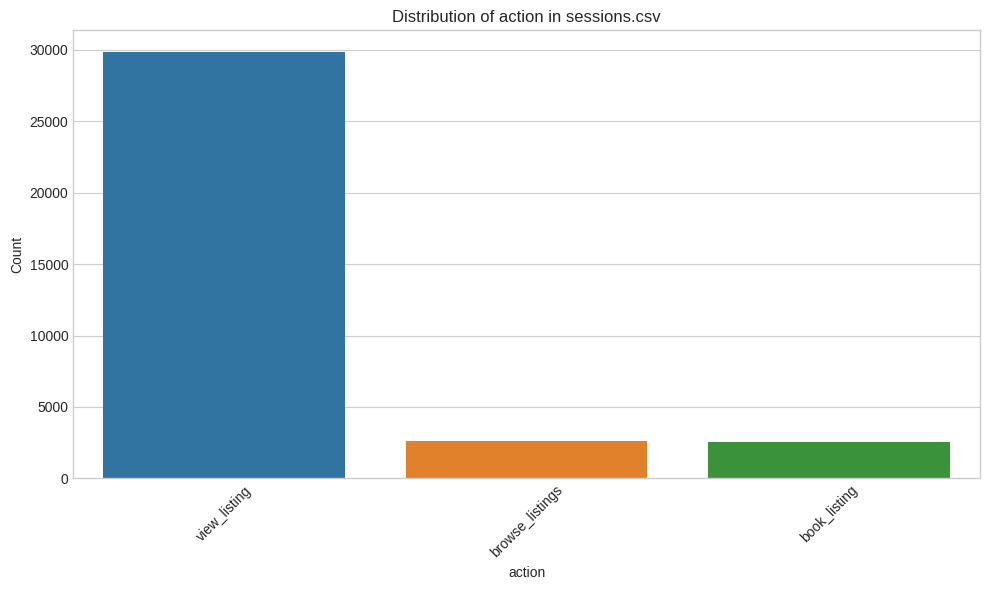

In [9]:
# Analyze distribution of values in sessions.csv (assuming it has action type column)
if "action_type" in sessions_df.columns or "action" in sessions_df.columns:
    action_col = "action_type" if "action_type" in sessions_df.columns else "action"
    print(f"Value counts for {action_col} in sessions.csv:")
    action_counts = sessions_df[action_col].value_counts()

    # Visualize the distribution
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=action_counts.index, y=action_counts.values)
    plt.title(f"Distribution of {action_col} in sessions.csv")
    plt.xlabel(action_col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print the counts
    action_counts

In [10]:
# Analyze distribution of demographic data in users.csv
if "country" in users_df.columns:
    print("Top countries in users.csv:")
    country_counts = users_df["country"].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=country_counts.index, y=country_counts.values)
    plt.title("Top 10 Countries in users.csv")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print the counts
    country_counts

In [11]:
# Check if we can link users and sessions
common_user_id_field = None

# Check potential ID fields in both dataframes
user_id_fields = [col for col in users_df.columns if "id" in col.lower()]
session_id_fields = [
    col
    for col in sessions_df.columns
    if "id" in col.lower() and "listing" not in col.lower()
]

print(f"Potential user ID fields in users.csv: {user_id_fields}")
print(f"Potential user ID fields in sessions.csv: {session_id_fields}")

# Check for common fields
for user_field in user_id_fields:
    for session_field in session_id_fields:
        if user_field == session_field:
            common_user_id_field = user_field
            print(f"Found common ID field: {common_user_id_field}")
            break

# If we found a common field, check how many sessions have users
if common_user_id_field:
    unique_users_in_sessions = sessions_df[common_user_id_field].nunique()
    unique_users_total = users_df[common_user_id_field].nunique()

    print(f"Unique users in sessions sample: {unique_users_in_sessions}")
    print(f"Unique users in users sample: {unique_users_total}")
    print(f"Coverage in sample: {unique_users_in_sessions / unique_users_total:.2%}")
else:
    print("No common ID field found to link users and sessions.")

Potential user ID fields in users.csv: ['id']
Potential user ID fields in sessions.csv: ['user_id']
No common ID field found to link users and sessions.


Unique listing IDs in sessions sample: 20020

Actions per listing statistics:
Min: 1
Max: 9
Mean: 1.62
Median: 1.0


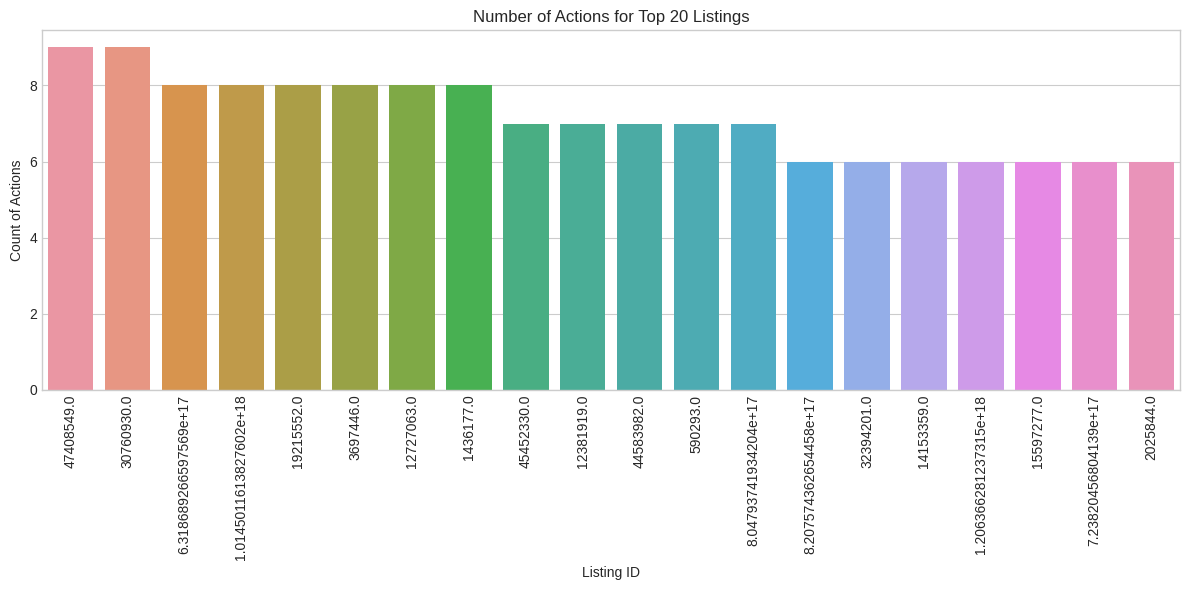

In [12]:
# Let's check if sessions.csv has a listing_id that can connect to listings.csv
if "listing_id" in sessions_df.columns:
    unique_listings_in_sessions = sessions_df["listing_id"].nunique()
    print(f"Unique listing IDs in sessions sample: {unique_listings_in_sessions}")

    # Check distribution of actions per listing
    actions_per_listing = sessions_df.groupby("listing_id").size()

    print(f"\nActions per listing statistics:")
    print(f"Min: {actions_per_listing.min()}")
    print(f"Max: {actions_per_listing.max()}")
    print(f"Mean: {actions_per_listing.mean():.2f}")
    print(f"Median: {actions_per_listing.median()}")

    # Visualize distribution of actions per listing (top 20)
    top_listings = actions_per_listing.sort_values(ascending=False).head(20)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=top_listings.index.astype(str), y=top_listings.values)
    plt.title("Number of Actions for Top 20 Listings")
    plt.xlabel("Listing ID")
    plt.ylabel("Count of Actions")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Converted timestamp to datetime


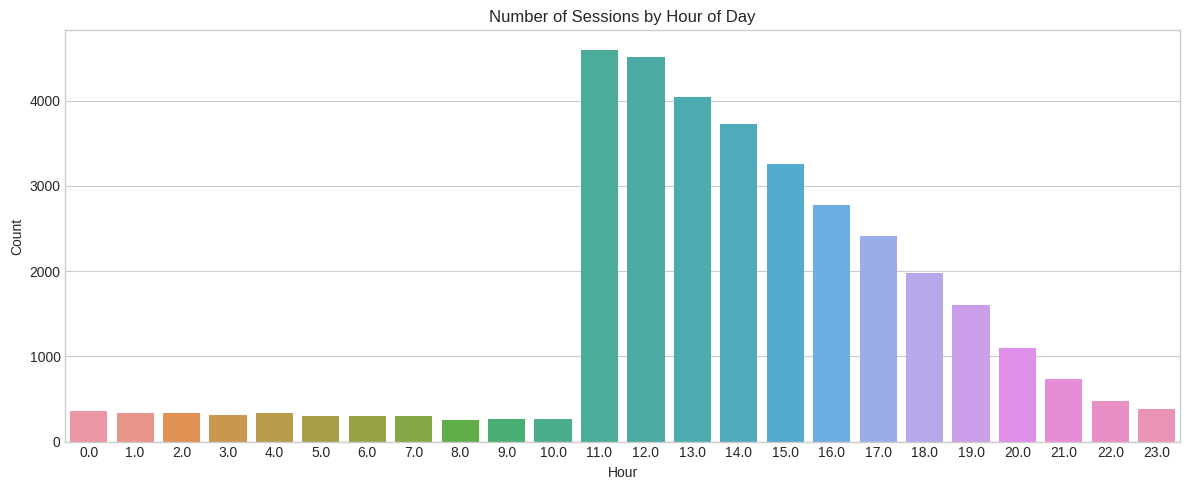

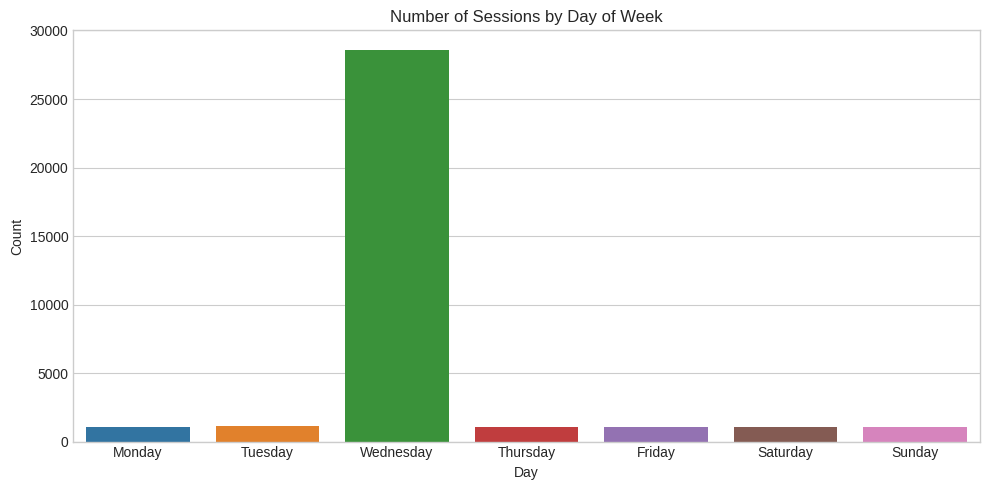

In [13]:
# Let's examine timestamp information in sessions to understand user behavior patterns
if "timestamp" in sessions_df.columns or "date" in sessions_df.columns:
    time_col = "timestamp" if "timestamp" in sessions_df.columns else "date"

    # Convert to datetime if it's not already
    if not pd.api.types.is_datetime64_any_dtype(sessions_df[time_col]):
        try:
            sessions_df[time_col] = pd.to_datetime(sessions_df[time_col])
            print(f"Converted {time_col} to datetime")
        except:
            print(f"Could not convert {time_col} to datetime, analyzing as is")

    # Extract hour, day of week if datetime conversion was successful
    if pd.api.types.is_datetime64_any_dtype(sessions_df[time_col]):
        sessions_df["hour"] = sessions_df[time_col].dt.hour
        sessions_df["day_of_week"] = sessions_df[time_col].dt.day_name()

        # Plot distribution by hour
        plt.figure(figsize=(12, 5))
        sns.countplot(x="hour", data=sessions_df)
        plt.title("Number of Sessions by Hour of Day")
        plt.xlabel("Hour")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

        # Plot distribution by day of week
        day_order = [
            "Monday",
            "Tuesday",
            "Wednesday",
            "Thursday",
            "Friday",
            "Saturday",
            "Sunday",
        ]
        plt.figure(figsize=(10, 5))
        sns.countplot(x="day_of_week", data=sessions_df, order=day_order)
        plt.title("Number of Sessions by Day of Week")
        plt.xlabel("Day")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

In [17]:
# Analyze user registration or activity dates if available
date_columns = [col for col in users_df.columns if "date" in col.lower()]
if date_columns:
    print(f"Date-related columns in users.csv: {date_columns}")

    for date_col in date_columns:
        try:
            users_df[date_col] = pd.to_datetime(users_df[date_col])

            # Plot user registrations/activity over time
            plt.figure(figsize=(12, 6))
            users_df[date_col].dt.year.value_counts().sort_index().plot(kind="bar")
            plt.title(f"User {date_col} by Year")
            plt.xlabel("Year")
            plt.ylabel("Count")
            plt.tight_layout()
            plt.show()

            # Plot by month (for the most recent year)
            if users_df[date_col].dt.year.max() > 2020:  # If we have recent data
                recent_year = users_df[date_col].dt.year.max()
                recent_data = users_df[users_df[date_col].dt.year == recent_year]

                plt.figure(figsize=(12, 6))
                recent_data[date_col].dt.month.value_counts().sort_index().plot(
                    kind="bar"
                )
                plt.title(f"User {date_col} by Month in {recent_year}")
                plt.xlabel("Month")
                plt.ylabel("Count")
                plt.tight_layout()
                plt.show()
        except:
            print(f"Could not convert {date_col} to datetime")

In [ ]:
print(f"Sessions DF Shape: {sessions_df.shape}")
print(f"Users DF Shape: {users_df.shape}")